# Normal Distribution of Stocks

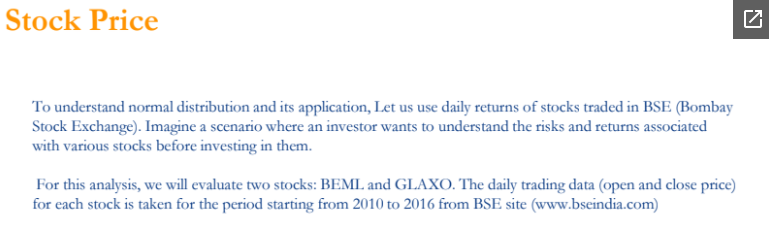

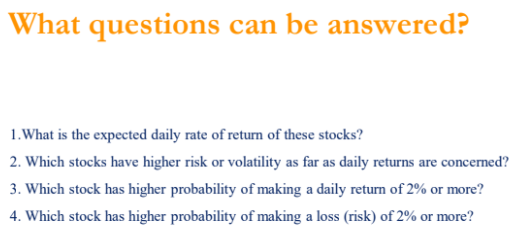

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import norm

In [5]:
beml=pd.read_csv("Database/beml_df.csv")
beml

,Date,Date.1,Close,gain
0,2010-01-05,2010-01-05,1134.60,-0.000881
1,2010-01-06,2010-01-06,1139.60,0.004407
2,2010-01-07,2010-01-07,1144.15,0.003993
3,2010-01-08,2010-01-08,1144.05,-0.000087
4,2010-01-11,2010-01-11,1137.00,-0.006162
...,...,...,...,...
1733,2016-12-26,2016-12-26,950.25,-0.021924
1734,2016-12-27,2016-12-27,975.70,0.026782
1735,2016-12-28,2016-12-28,974.40,-0.001332
1736,2016-12-29,2016-12-29,986.05,0.011956


In [7]:
glaxo=pd.read_csv("Database/glaxo_df.csv")
glaxo

,Date,Date.1,Close,gain
0,2010-01-05,2010-01-05,1616.80,-0.005444
1,2010-01-06,2010-01-06,1638.50,0.013422
2,2010-01-07,2010-01-07,1648.70,0.006225
3,2010-01-08,2010-01-08,1639.80,-0.005398
4,2010-01-11,2010-01-11,1629.45,-0.006312
...,...,...,...,...
1733,2016-12-26,2016-12-26,2723.50,-0.001283
1734,2016-12-27,2016-12-27,2701.75,-0.007986
1735,2016-12-28,2016-12-28,2702.15,0.000148
1736,2016-12-29,2016-12-29,2727.90,0.009529


In [24]:
beml_df=beml[['Date','Close']]
beml_df

,Date,Close
0,2010-01-05,1134.60
1,2010-01-06,1139.60
2,2010-01-07,1144.15
3,2010-01-08,1144.05
4,2010-01-11,1137.00
...,...,...
1733,2016-12-26,950.25
1734,2016-12-27,975.70
1735,2016-12-28,974.40
1736,2016-12-29,986.05


In [25]:
glaxo_df=glaxo[['Date','Close']]
glaxo_df

,Date,Close
0,2010-01-05,1616.80
1,2010-01-06,1638.50
2,2010-01-07,1648.70
3,2010-01-08,1639.80
4,2010-01-11,1629.45
...,...,...
1733,2016-12-26,2723.50
1734,2016-12-27,2701.75
1735,2016-12-28,2702.15
1736,2016-12-29,2727.90


In [81]:
# Creating DatetimeIndex from column date to plot trends over time
beml_dti=beml_df.set_index(pd.DatetimeIndex(beml['Date']))
beml_dti

,Date,Close
Date,,
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
2010-01-11,2010-01-11,1137.00
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


In [82]:
glaxo_dti=glaxo_df.set_index(pd.DatetimeIndex(glaxo['Date']))
glaxo_dti

,Date,Close
Date,,
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
2010-01-11,2010-01-11,1629.45
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


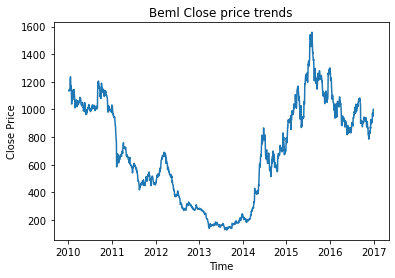

In [80]:
# Plotting Close price trends
plt.plot(beml_dti.Close)
plt.title('Beml Close price trends')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

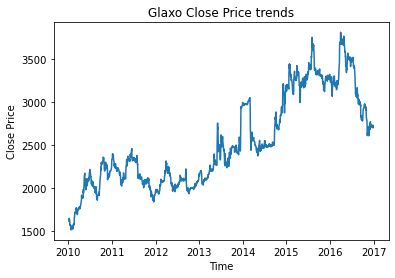

In [33]:
plt.plot(glaxo_dti.Close)
plt.title('Glaxo Close Price trends')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

#### Q1. Expected daily Rate of return from these stocks

Rate of return is Gain for positive values and Loss for negative values

In [39]:
beml_dti['Gain']=beml_dti.Close.pct_change(periods=1)
beml_dti[['Gain']].dropna() # to remove NA values

,Gain
Date,
2010-01-06,0.004407
2010-01-07,0.003993
2010-01-08,-0.000087
2010-01-11,-0.006162
2010-01-12,0.005849
...,...
2016-12-26,-0.021924
2016-12-27,0.026782
2016-12-28,-0.001332


In [43]:
glaxo_dti['Gain']=glaxo_dti.Close.pct_change(periods=1)
glaxo_dti[['Gain']].dropna()

,Gain
Date,
2010-01-06,0.013422
2010-01-07,0.006225
2010-01-08,-0.005398
2010-01-11,-0.006312
2010-01-12,-0.027985
...,...
2016-12-26,-0.001283
2016-12-27,-0.007986
2016-12-28,0.000148


In [50]:
# Plotting Gains or Losses over time for both the stocks

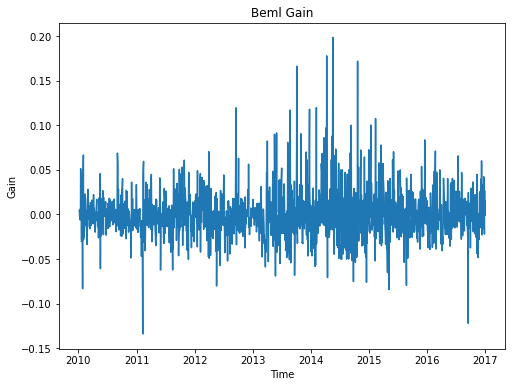

In [46]:
plt.figure(figsize=(8,6))
plt.plot(beml_dti.Gain)
plt.title('Beml Gain')
plt.xlabel('Time')
plt.ylabel('Gain')
plt.show()

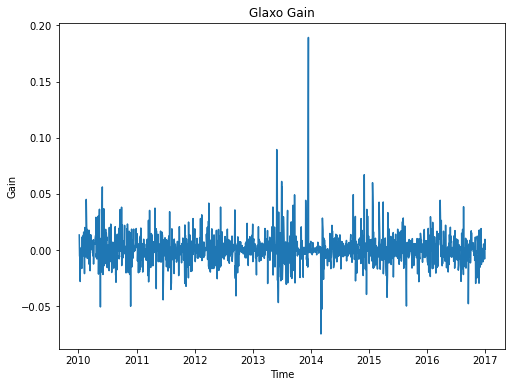

In [48]:
plt.figure(figsize=(8,6))
plt.plot(glaxo_dti.Gain)
plt.title('Glaxo Gain')
plt.xlabel('Time')
plt.ylabel('Gain')
plt.show()

In [49]:
# Plotting the normal distribution for both the stocks

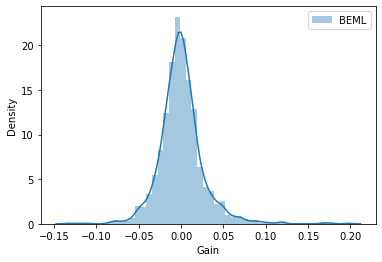

In [59]:
sns.distplot(beml_dti.Gain,label='BEML')
plt.xlabel('Gain')
plt.ylabel('Density')
plt.legend();

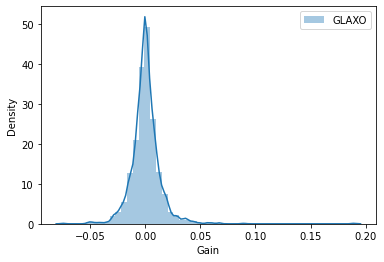

In [58]:
sns.distplot(glaxo_dti.Gain,label='GLAXO')
plt.xlabel('Gain')
plt.ylabel('Density')
plt.legend();

In [62]:
print('Beml mean:',round(beml_dti.Gain.mean(),4))
print('Beml SD:',round(beml_dti.Gain.std(),4))

Beml mean: 0.0003
Beml SD: 0.0264


In [63]:
print('Glaxo mean:',round(glaxo_dti.Gain.mean(),4))
print('Glaxo SD:',round(glaxo_dti.Gain.std(),4))

Glaxo mean: 0.0004
Glaxo SD: 0.0134


#### Q2. Which Stocks have higher risks or volatality as far as daily returns are concerned 

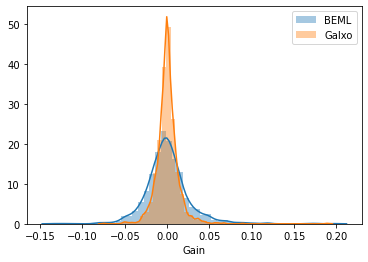

In [68]:
sns.distplot(beml_dti.Gain,label='BEML')
sns.distplot(glaxo_dti.Gain,label='Glaxo')
plt.legend();

#### Q3. Which Stock has higher probability of making a daily return of 2% or more

In [70]:
# P(X_beml>0.02)
1-stats.norm.cdf(0.02,0.0003,0.0264)

0.2277696435431158

In [71]:
# P(X_glaxo>0.02)
1-stats.norm.cdf(0.02,0.0004,0.0134)

0.07177658173190637

#### Q4. Which Stock has higher probability of making a loss (risk) of 2% or more

In [73]:
# P(X_beml>-0.02)
1-stats.norm.cdf(-0.02,0.0003,0.0264)

0.779035355037202

In [74]:
# P(X_glaxo>-0.02)
1-stats.norm.cdf(-0.02,0.0004,0.0134)

0.9360440625606244

#### Q5. Compute 2% loss or gain for both the stocks

In [76]:
# P(-0.02 >= X_beml >= 0.02)
stats.norm.cdf(0.02,0.0003,0.0264)-stats.norm.cdf(-0.02,0.0003,0.0264)

0.5512657114940862

In [77]:
# P(-0.02 >= X_glaxo >= 0.02)
stats.norm.cdf(0.02,0.0004,0.0134)-stats.norm.cdf(-0.02,0.0004,0.0134)

0.8642674808287181